1. Import Libraries
2. Import Data Set
3. Heat Map
4. Scatterplot
5. Pair Plot
6. Categorical plot
7. Questions Revisited
8. Hypothesis

In [ ]:
# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# 2. Import Data Set

In [3]:
path = r'C:\Users\RUD\Desktop\A6_Boat_Sales'

In [4]:
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_wrangled.csv'), index_col = False)

In [6]:
df_boat.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days', 'Price in EUR'],
      dtype='object')

In [13]:
sub = df_boat[[ 'Year Built',
       'Length', 'Width',
       'Number of views last 7 days', 'Price in EUR']]

Year Built  Length  Width  Number of views last 7 days  Price in EUR
0           2017    4.00   1.90                          226          3370
1           2020    4.00   1.50                           75          3490
2              0    3.69   1.42                          124          3807
3           2020    3.00   1.00                           64          3367
4           2019    3.55   1.46                           58          3399
...          ...     ...    ...                          ...           ...
9883        1987    6.30   2.44                         1116          4949
9884           0    4.17   1.68                           94          4516
9885        2020    4.40   1.80                          354          4499
9886        2018    4.37   1.89                          266          4300
9887        2019    3.60   1.60                          194          3817

[9888 rows x 5 columns]

In [ ]:
# 3. Heat Map

In [26]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

In [16]:
# The highest correlation is between Length and Width which is not a big surprise because there are bigger and smaller boats.
# The next best correlation (in red is) between Length and Price and then Width and Price: Big boats are usually more expensive
# than smaller ones. I considered expansive boats to get more views (one of my research questions)
# Other correlations seem to be unlikely

In [ ]:
# 4. Scatterplot

In [29]:
sub

Year Built  Length  Width  Number of views last 7 days  Price in EUR
0           2017    4.00   1.90                          226          3370
1           2020    4.00   1.50                           75          3490
2              0    3.69   1.42                          124          3807
3           2020    3.00   1.00                           64          3367
4           2019    3.55   1.46                           58          3399
...          ...     ...    ...                          ...           ...
9883        1987    6.30   2.44                         1116          4949
9884           0    4.17   1.68                           94          4516
9885        2020    4.40   1.80                          354          4499
9886        2018    4.37   1.89                          266          4300
9887        2019    3.60   1.60                          194          3817

[9888 rows x 5 columns]

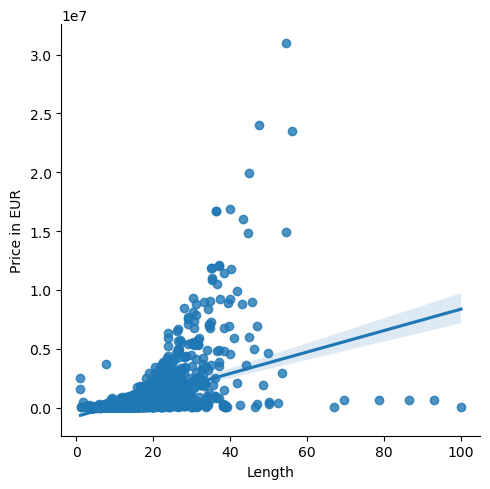

In [30]:
sns.lmplot(x = 'Length', y = 'Price in EUR', data = sub)

In [ ]:
# THe correlation is visable - but there are a few outliners which should be analysed in detail:
# maybe they are older or used boats

In [ ]:
# 5. Pair Plot

C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

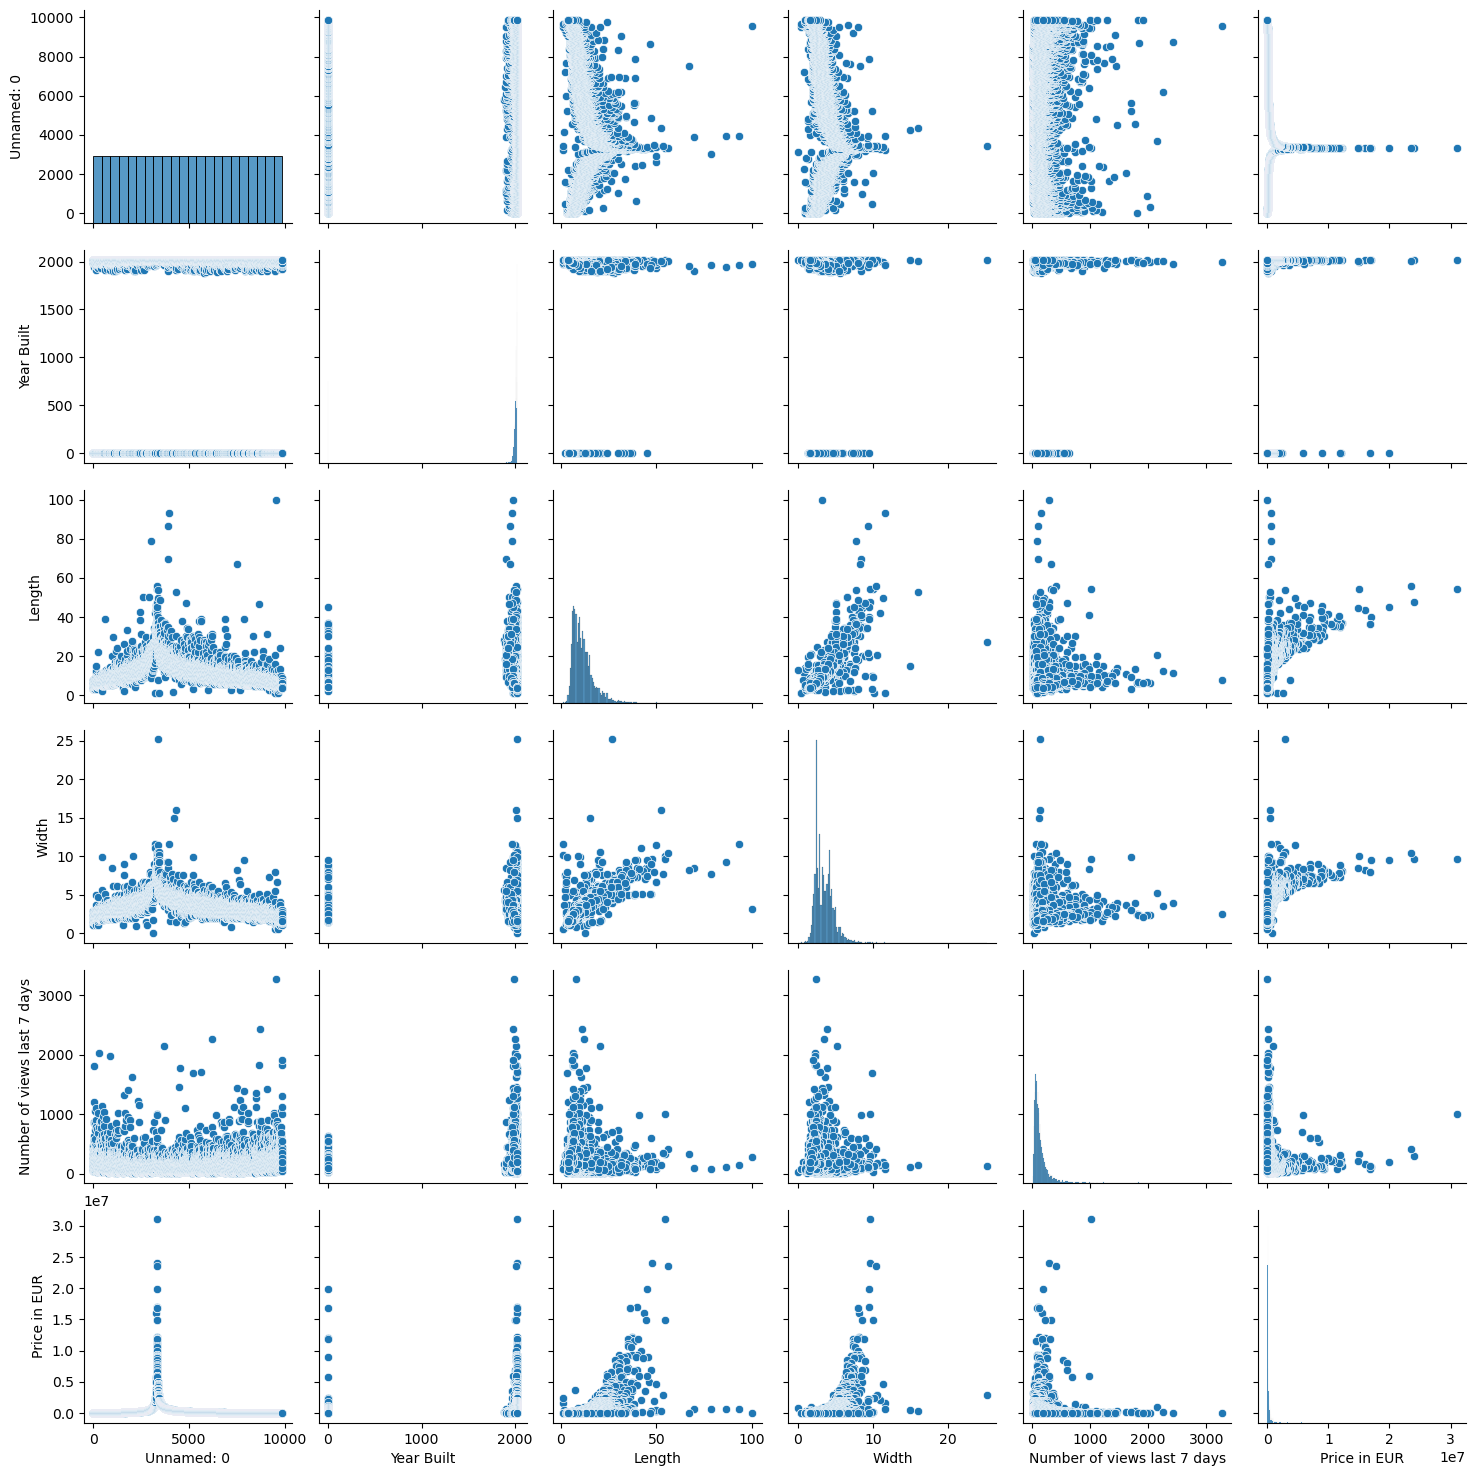

In [18]:
# Create a pair plot 

df_boat = sns.pairplot(df_boat)

In [31]:
# I'm interested in the views variable because this is a vital metric for an E-Commerce business and which boat types
# are popular. This could be a starting point for a segmented marketing campaign for example. 

In [32]:
# 6.Categorical plot

In [73]:
df_boat = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_wrangled.csv'), index_col = False)

C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Number of views last 7 days', ylabel='Count'>

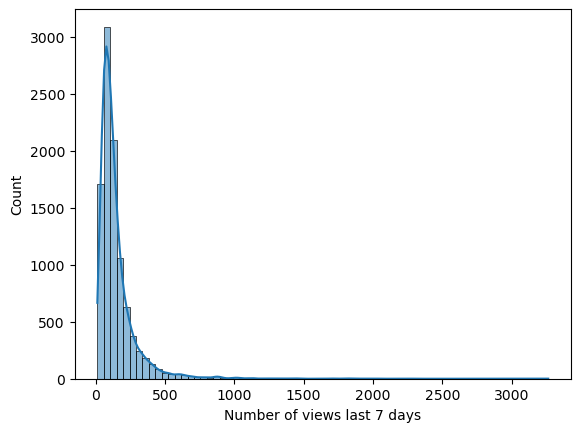

In [76]:
sns.histplot(df_boat['Number of views last 7 days'], bins = 70, kde = True)

In [77]:
df_boat.loc[df_boat['Number of views last 7 days'] < 100, 'Visibility'] = 'Low Visibility'
df_boat.loc[(df_boat['Number of views last 7 days'] >= 100) & (df_boat['Number of views last 7 days'] < 300), 'Visibility'] = 'Middle Visibility'
df_boat.loc[df_boat['Number of views last 7 days'] >= 300, 'Visibility'] = 'High Visibility'

In [79]:
df_boat['Visibility'].value_counts(dropna = False)

Visibility
Middle Visibility    4553
Low Visibility       4449
High Visibility       886
Name: count, dtype: int64

In [80]:
df_boat

Unnamed: 0            Boat Type           Manufacturer  \
0              0          Motor Yacht   Rigiflex power boats   
1              1  Center console boat      Terhi power boats   
2              2           Sport Boat     Marine power boats   
3              3           Sport Boat     Pioner power boats   
4              4         Fishing Boat     Linder power boats   
...          ...                  ...                    ...   
9883        9883           Sport Boat    Sea Ray power boats   
9884        9884           Sport Boat                    NaN   
9885        9885           Sport Boat  BlueCraft power boats   
9886        9886         Pontoon Boat      Whaly power boats   
9887        9887         Fishing Boat    DarekCo power boats   

                              Type  Year Built  Length  Width       Material  \
0              new boat from stock        2017    4.00   1.90            NaN   
1              new boat from stock        2020    4.00   1.50  Thermoplastic   
2              new boat from stock           0    3.69   1.42      Aluminium   
3              new boat from stock        2020    3.00   1.00            NaN   
4              new boat from stock        2019    3.55   1.46      Aluminium   
...                            ...         ...     ...    ...            ...   
9883            Used boat,Unleaded        1987    6.30   2.44            NaN   
9884           new boat from stock           0    4.17   1.68            GRP   
9885  new boat from stock,Unleaded        2020    4.40   1.80            GRP   
9886           new boat from stock        2018    4.37   1.89            NaN   
9887           new boat from stock        2019    3.60   1.60            GRP   

         Location  Number of views last 7 days  Price in EUR  \
0     Switzerland                          226          3370   
1         Germany                           75          3490   
2     Switzerland                          124          3807   
3         Denmark                           64          3367   
4         Germany                           58          3399   
...           ...                          ...           ...   
9883  Switzerland                         1116          4949   
9884      Germany                           94          4516   
9885      Germany                          354          4499   
9886        Italy                          266          4300   
9887  Switzerland                          194          3817   

             Visibility  
0     Middle Visibility  
1        Low Visibility  
2     Middle Visibility  
3        Low Visibility  
4        Low Visibility  
...                 ...  
9883    High Visibility  
9884     Low Visibility  
9885    High Visibility  
9886  Middle Visibility  
9887  Middle Visibility  

[9888 rows x 12 columns]

In [81]:
df_boat.columns

Index(['Unnamed: 0', 'Boat Type', 'Manufacturer', 'Type', 'Year Built',
       'Length', 'Width', 'Material', 'Location',
       'Number of views last 7 days', 'Price in EUR', 'Visibility'],
      dtype='object')

In [86]:
# Create a categorical plot in seaborn using the Visability categories created above

sns.set(style="ticks")
g = sns.catplot(x="Year Built", y="Number of views last 7 days", hue="Visibility", data=df_boat)

C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\RUD\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


In [87]:
# Visability increases for newer boats - older boats don't have that much Visibility

In [88]:
#7 . Questions Revisited

Which boats were most viewed? Newer boats as seen above

Is there a relationship between views and price? The heat map tells No.


In [89]:
# 8. Hypothesis / further 

If a boat is newer than it will get more views.
If a boat is smaller in length it will be cheaper in price.

In [90]:
df_boat.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'boat_data_relation.csv'))